# Project Assignment B

## Loading and Cleaning the Data

Load WikiLeaks Afghan War Diary from 2004-2009.

In [1]:
# Pandas contains useful functions for data structures with "relational" or "labeled" data
import pandas

# header as suggested
# by WikiLeaks: https://wikileaks.org/afg/
# by the Guardian: http://www.theguardian.com/world/datablog/2010/jul/25/wikileaks-afghanistan-data
header = [
    'ReportKey', # find messages and also to reference them
    'DateOccurred', 'EventType', 
    'Category', # describes what kind of event the message is about
    'TrackingNumber', 'Title', # internal tracking number and title
    'Summary', # actual description of the event
    'Region', # broader region of the event.
    'AttackOn', # who was attacked during an event
    'ComplexAttack', #  signifies that an attack was a larger operation that required more planning, coordination and preparatio
    'ReportingUnit', 'UnitName', 'TypeOfUnit', # information on the military unit that authored the report
    'FriendlyWounded', 'FriendlyKilled', 'HostNationWounded', 'HostNationKilled', 'CivilianWounded', 'CivilianKilled', 
    'EnemyWounded', 'EnemyKilled', 'EnemyDetained', # who was killed/wounded/captured
    'MilitaryGridReferenceSystem', 'Latitude', 'Longitude', # location
    'OriginatorGroup', 'UpdatedByGroup', # message originated from or was updated by
    'CommandersCriticalInformationRequirements', 
    'Significant', # are analyzed and evaluated by special group in command centre
    'Affiliation', # event was of friendly, neutral or enemy nature
    'DisplayColor', # enemy activity - RED, friendly activity - BLUE, friend on friend - GREEN
    'ClassificationLevel' # classification level of the message, e.g.: Secret
]

data = pandas.read_csv('../../../data/afg.csv', header=None, names=header)
data.head()

,ReportKey,DateOccurred,EventType,Category,TrackingNumber,Title,Summary,Region,AttackOn,ComplexAttack,...,MilitaryGridReferenceSystem,Latitude,Longitude,OriginatorGroup,UpdatedByGroup,CommandersCriticalInformationRequirements,Significant,Affiliation,DisplayColor,ClassificationLevel
0,D92871CA-D217-4124-B8FB-89B9A2CFFCB4,2004-01-01 00:00:00,Enemy Action,Direct Fire,2007-033-004042-0756,DIRECT FIRE Other,KAF-1BDE -S3 REPORTS: SUMMIT 09 B CO ELEMENT S...,RC EAST,ENEMY,False,...,42SWB3900916257,32.683319,69.416107,UNKNOWN,UNKNOWN,NaN,NaN,ENEMY,RED,SECRET
1,C592135C-1BFF-4AEC-B469-0A495FDA78D9,2004-01-01 00:00:00,Friendly Action,Cache Found/Cleared,2007-033-004738-0185,CACHE FOUND/CLEARED Other,USSF FINDS CACHE IN VILLAGE OF WALU TANGAY: US...,RC EAST,FRIEND,False,...,42SXD7520076792,35.018608,70.920273,UNKNOWN,UNKNOWN,NaN,NaN,FRIEND,BLUE,SECRET
2,D50F59F0-6F32-4E63-BC02-DB2B8422DE6E,2004-01-01 00:00:00,Non-Combat Event,Propaganda,2007-033-010818-0798,PROPAGANDA Other,(M) NIGHT LETTERS DISTRIBUTED AROUND HAZARJUFT...,RC SOUTH,NEUTRAL,False,...,41RPQ1439743120,31.116390,64.199707,UNKNOWN,UNKNOWN,NaN,NaN,NEUTRAL,GREEN,SECRET
3,E3F22EFB-F0CA-4821-9322-CC2250C05C8A,2004-01-01 00:00:00,Enemy Action,Direct Fire,2007-033-004042-0850,DIRECT FIRE Other,KAF-1BDE -S3: SUMMIT 6 REPORTS TIC SALUTE TO F...,RC EAST,ENEMY,False,...,42SWB3399911991,32.645000,69.362511,UNKNOWN,UNKNOWN,NaN,NaN,ENEMY,RED,SECRET
4,4D0E1E60-9535-4D58-A374-74367F058788,2004-01-01 00:00:00,Friendly Action,Cache Found/Cleared,2007-033-004738-0279,CACHE FOUND/CLEARED Other,KAF-1BDE -S3 REPORTS: GERONIMO 11 SALUTE AS FO...,RC EAST,FRIEND,False,...,42SWB7580277789,33.236389,69.813606,UNKNOWN,UNKNOWN,NaN,NaN,FRIEND,BLUE,SECRET


In [2]:
######Exploratory analysis

#data['Year'] = [int(date.split("-")[0]) for date in data['DateOccurred']]
data['DateOccurred'] = pandas.to_datetime(data['DateOccurred'])

data['Year'] = [date.year for date in data['DateOccurred']]
data['Hour'] = [date.hour for date in data['DateOccurred']]

#Number of rows/columns
print "Number of rows: %d" % data.shape[0]
print "Number of columns: %d" % data.shape[1]

date_range = set()
for date in data['DateOccurred']:
    date_range.add(date.year)

print "\nYears:\n"
print list(date_range)

#Ocurrences of categories
print "\nNumber of unique categories: %d" %len(set(data['Category']))

#Distribution of categoriesn_occurrences[0:20]
n_occurrences = data['Category'].value_counts()

print "\nMost commonly occurring categories of crime:\n"
print n_occurrences.head()

print "\nMost commonly occurring category of crime is %s with %d" % (n_occurrences.argmax(), n_occurrences.max())
print "\nLeast commonly occurring category of crime is %s with %d" % (n_occurrences.argmin(), n_occurrences.min())


Number of rows: 76911
Number of columns: 34

Years:

[2004, 2005, 2006, 2007, 2008, 2009]

Number of unique categories: 168

Most commonly occurring categories of crime:

Direct Fire          16293
IED Found/Cleared     8581
Indirect Fire         7237
IED Explosion         7202
Other                 4005
dtype: int64

Most commonly occurring category of crime is Direct Fire with 16293

Least commonly occurring category of crime is Security Breach with 1


## Casualties recorded by the Afghanistan database

Example for the visualization in d3: https://bl.ocks.org/mbostock/3887051

Afghan forces:
* HostNationWounded
* HostNationKilled

Taliban:
* EnemyWounded
* EnemyKilled

Civilians:
* CivilianWounded
* CivilianKilled

NATO forces:
* FriendlyWounded 
* FriendlyKilled 

Two different plots. One grouped bar chart for wounded and another one for killed. Use buttons to toggle between them.

In [3]:
db = pandas.concat([data['Year'],data['HostNationWounded'], data['HostNationKilled'],
              data['EnemyWounded'], data['EnemyKilled'],
              data['CivilianWounded'], data['CivilianKilled'],
              data['FriendlyWounded'], data['FriendlyKilled']]
              , axis=1)
db.head()

,Year,HostNationWounded,HostNationKilled,EnemyWounded,EnemyKilled,CivilianWounded,CivilianKilled,FriendlyWounded,FriendlyKilled
0,2004,0,0,0,3,0,0,0,0
1,2004,0,0,0,0,0,0,0,0
2,2004,0,0,0,0,0,0,0,0
3,2004,0,0,0,8,0,0,0,0
4,2004,0,0,0,0,0,0,0,0


In [4]:
casualties = {}

for date in date_range:
    db_year = db[db['Year'] == date]
    casualties[str(date)]= {}
    for column in db.columns:
        if column != 'Year':
            casualties[str(date)][column] = db_year[column].sum()

In [5]:
for key in sorted(casualties.iterkeys()):
    print "%s: %s" % (key, casualties[key])

2004: {'HostNationKilled': 218.0, 'FriendlyWounded': 133.0, 'HostNationWounded': 316.0, 'EnemyWounded': 93.0, 'FriendlyKilled': 22.0, 'EnemyKilled': 343.0, 'CivilianKilled': 219.0, 'CivilianWounded': 208.0}
2005: {'HostNationKilled': 180.0, 'FriendlyWounded': 480.0, 'HostNationWounded': 504.0, 'EnemyWounded': 200.0, 'FriendlyKilled': 71.0, 'EnemyKilled': 890.0, 'CivilianKilled': 178.0, 'CivilianWounded': 454.0}
2006: {'HostNationKilled': 605.0, 'FriendlyWounded': 1083.0, 'HostNationWounded': 1397.0, 'EnemyWounded': 252.0, 'FriendlyKilled': 142.0, 'EnemyKilled': 2689.0, 'CivilianKilled': 800.0, 'CivilianWounded': 1794.0}
2007: {'HostNationKilled': 951.0, 'FriendlyWounded': 1652.0, 'HostNationWounded': 2093.0, 'EnemyWounded': 377.0, 'FriendlyKilled': 186.0, 'EnemyKilled': 4044.0, 'CivilianKilled': 758.0, 'CivilianWounded': 1962.0}
2008: {'HostNationKilled': 699.0, 'FriendlyWounded': 1255.0, 'HostNationWounded': 1749.0, 'EnemyWounded': 285.0, 'FriendlyKilled': 244.0, 'EnemyKilled': 2816.0

In [6]:
Wounded = {}
for date in date_range:
    
    Wounded[str(date)]= {}
    
    Wounded[str(date)]['Afghan forces'] = casualties[str(date)]['HostNationWounded']
    Wounded[str(date)]['Taliban'] = casualties[str(date)]['EnemyWounded']
    Wounded[str(date)]['Civilians'] = casualties[str(date)]['CivilianWounded']
    Wounded[str(date)]['Nato forces'] = casualties[str(date)]['FriendlyWounded']
    

In [7]:
for key in sorted(Wounded.iterkeys()):
    print "%s: %s" % (key, Wounded[key])

2004: {'Afghan forces': 316.0, 'Nato forces': 133.0, 'Taliban': 93.0, 'Civilians': 208.0}
2005: {'Afghan forces': 504.0, 'Nato forces': 480.0, 'Taliban': 200.0, 'Civilians': 454.0}
2006: {'Afghan forces': 1397.0, 'Nato forces': 1083.0, 'Taliban': 252.0, 'Civilians': 1794.0}
2007: {'Afghan forces': 2093.0, 'Nato forces': 1652.0, 'Taliban': 377.0, 'Civilians': 1962.0}
2008: {'Afghan forces': 1749.0, 'Nato forces': 1255.0, 'Taliban': 285.0, 'Civilians': 1980.0}
2009: {'Afghan forces': 2444.0, 'Nato forces': 2693.0, 'Taliban': 617.0, 'Civilians': 2646.0}


In [8]:
##writing data to a dataframe for visualizing it with D3

data_wounded = pandas.DataFrame()

data_wounded['Year'] = [key for key in sorted(Wounded.iterkeys())]
data_wounded['Afghan forces'] = [Wounded[key]['Afghan forces'] for key in sorted(Wounded.iterkeys())]
data_wounded['Nato forces'] = [Wounded[key]['Nato forces'] for key in sorted(Wounded.iterkeys())]
data_wounded['Taliban'] = [Wounded[key]['Taliban'] for key in sorted(Wounded.iterkeys())]
data_wounded['Civilians'] = [Wounded[key]['Civilians'] for key in sorted(Wounded.iterkeys())]

data_wounded

,Year,Afghan forces,Nato forces,Taliban,Civilians
0,2004,316,133,93,208
1,2005,504,480,200,454
2,2006,1397,1083,252,1794
3,2007,2093,1652,377,1962
4,2008,1749,1255,285,1980
5,2009,2444,2693,617,2646


In [9]:
data_wounded.to_csv('../../../data/Wounded', sep=',', index=False)

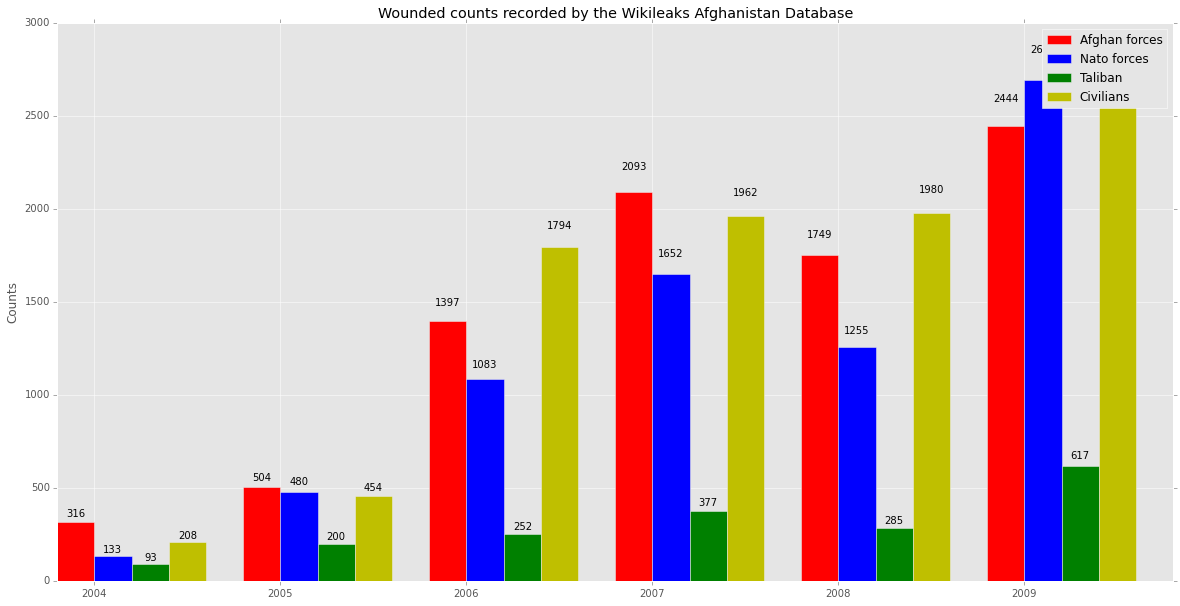

In [10]:
#multi bar plot of killed
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

N = 6
ind = np.arange(N)  # the x locations for the groups
width = 0.2     # the width of the bars

Afghan_forces = list(data_wounded['Afghan forces'])
Nato_forces = list(data_wounded['Nato forces'])
Taliban = list(data_wounded['Taliban'])
Civilians = list(data_wounded['Civilians'])

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(ind, Afghan_forces, width, color='r')
rects2 = ax.bar(ind + width, Nato_forces, width, color='b')
rects3 = ax.bar(ind + width*2, Taliban, width, color='g')
rects4 = ax.bar(ind + width*3, Civilians, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Counts')
ax.set_title('Wounded counts recorded by the Wikileaks Afghanistan Database')
ax.set_xticks(ind + width)
ax.set_xticklabels(('2004', '2005', '2006', '2007', '2008', '2009'))

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('Afghan forces', 'Nato forces', 'Taliban', 'Civilians'))

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()


In [11]:
Killed = {}
for date in date_range:
    
    Killed[str(date)]= {}
    
    Killed[str(date)]['Afghan forces'] = casualties[str(date)]['HostNationKilled']
    Killed[str(date)]['Taliban'] = casualties[str(date)]['EnemyKilled']
    Killed[str(date)]['Civilians'] = casualties[str(date)]['CivilianKilled']
    Killed[str(date)]['Nato forces'] = casualties[str(date)]['FriendlyKilled']
    

In [12]:
for key in sorted(Killed.iterkeys()):
    print "%s: %s" % (key, Killed[key])

2004: {'Afghan forces': 218.0, 'Nato forces': 22.0, 'Taliban': 343.0, 'Civilians': 219.0}
2005: {'Afghan forces': 180.0, 'Nato forces': 71.0, 'Taliban': 890.0, 'Civilians': 178.0}
2006: {'Afghan forces': 605.0, 'Nato forces': 142.0, 'Taliban': 2689.0, 'Civilians': 800.0}
2007: {'Afghan forces': 951.0, 'Nato forces': 186.0, 'Taliban': 4044.0, 'Civilians': 758.0}
2008: {'Afghan forces': 699.0, 'Nato forces': 244.0, 'Taliban': 2816.0, 'Civilians': 798.0}
2009: {'Afghan forces': 1143.0, 'Nato forces': 481.0, 'Taliban': 4437.0, 'Civilians': 1241.0}


In [13]:
##writing data to a dataframe for visualizing it with D3

data_killed = pandas.DataFrame()

data_killed['Year'] = [key for key in sorted(Killed.iterkeys())]
data_killed['Afghan forces'] = [Killed[key]['Afghan forces'] for key in sorted(Killed.iterkeys())]
data_killed['Nato forces'] = [Killed[key]['Nato forces'] for key in sorted(Killed.iterkeys())]
data_killed['Taliban'] = [Killed[key]['Taliban'] for key in sorted(Killed.iterkeys())]
data_killed['Civilians'] = [Killed[key]['Civilians'] for key in sorted(Killed.iterkeys())]

data_killed

,Year,Afghan forces,Nato forces,Taliban,Civilians
0,2004,218,22,343,219
1,2005,180,71,890,178
2,2006,605,142,2689,800
3,2007,951,186,4044,758
4,2008,699,244,2816,798
5,2009,1143,481,4437,1241


In [14]:
data_killed.to_csv('../../../data/Killed', sep=',', index=False)

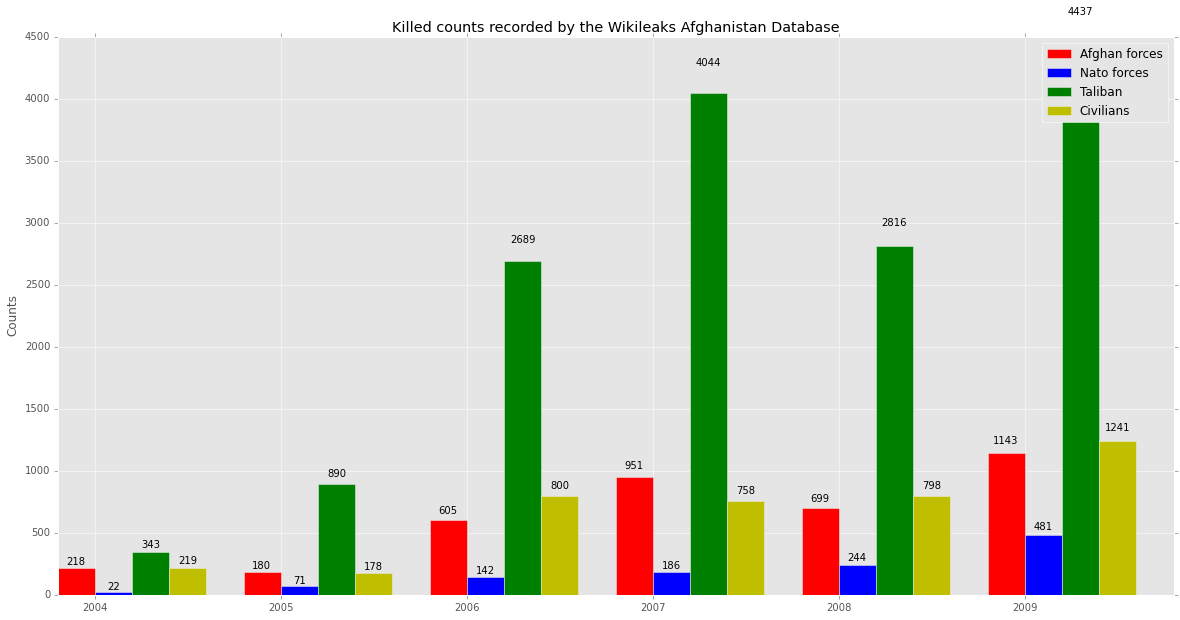

In [15]:
Afghan_forces = list(data_killed['Afghan forces'])
Nato_forces = list(data_killed['Nato forces'])
Taliban = list(data_killed['Taliban'])
Civilians = list(data_killed['Civilians'])

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(ind, Afghan_forces, width, color='r')
rects2 = ax.bar(ind + width, Nato_forces, width, color='b')
rects3 = ax.bar(ind + width*2, Taliban, width, color='g')
rects4 = ax.bar(ind + width*3, Civilians, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Counts')
ax.set_title('Killed counts recorded by the Wikileaks Afghanistan Database')
ax.set_xticks(ind + width)
ax.set_xticklabels(('2004', '2005', '2006', '2007', '2008', '2009'))

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('Afghan forces', 'Nato forces', 'Taliban', 'Civilians'))

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

## WordClouds

Example for d3 visualization of wordclouds: http://bl.ocks.org/jwhitfieldseed/9697914

In [16]:
import bs4
from bs4 import BeautifulSoup
import urllib2

url = 'http://www.theguardian.com/world/datablog/2010/jul/25/wikileaks-afghanistan-war-logs-glossary'
html = urllib2.urlopen(url).read()
soup = BeautifulSoup(html)
table = soup.find("table")

acronym = []
meaning = []

for row in table.findAll("tr"):
    cells = row.findAll("td")
    #For each "tr", assign each "td" to a variable.
    if len(cells) == 2:
        acronym.append(cells[0].find(text=True).rstrip())
        meaning.append(cells[1].find(text=True).rstrip())

#building dictionary
map_shortcuts = {}

for index in range(len(acronym)):
    map_shortcuts[acronym[index]] = meaning[index]

In [17]:
import operator

sorted(map_shortcuts.items(), key=operator.itemgetter(1))[:10]

[(u'C/S', u' Call sign'),
 (u'L:', u' Location (in relation to S, A, L, T)'),
 (u'OBJ', u' Objective'),
 (u'BSN', u'(Camp) Bastion'),
 (u'cgbg 1 coy', u'1 company, Coldstream Guards battle group'),
 (u'GBU-31', u'2,000lb "smart bomb\''),
 (u'42 CDO RM', u'42 Commando Royal Marines'),
 (u'GBU-12', u'500lb laser-guided "smart bomb"'),
 (u'508 STB', u'508th special troops battalion'),
 (u'81', u'81mm mortar round')]

In [18]:
indices = [66,68,72,80,82,96,100,102,109,124]

categ = [n_occurrences.index[idx] for idx in indices]

db_wc = data[data['Category'].isin(categ)]


In [19]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

def matchwords(words):

    text = []

    for word in words:
        if word in map_shortcuts:
            text.append(word.replace(word, map_shortcuts[word]))
        else:
            text.append(word)
            
    return ' '.join(text)

In [20]:
#remove rows with nans in summary
db_wc_filt = db_wc[db_wc['Summary'].notnull()]

#get indices of the filtered dataframe
indices = [index for index in db_wc_filt.index]

long_summary = []
for row in indices:
    words = tokenizer.tokenize(db_wc_filt['Summary'][row])
    long_summary.append(matchwords(words))

In [21]:
db_wc_filt.insert(7, 'Extended Summary', long_summary)

In [22]:
db_wc_filt.head()

,ReportKey,DateOccurred,EventType,Category,TrackingNumber,Title,Summary,Extended Summary,Region,AttackOn,...,Longitude,OriginatorGroup,UpdatedByGroup,CommandersCriticalInformationRequirements,Significant,Affiliation,DisplayColor,ClassificationLevel,Year,Hour
184,4A9E37A8-367A-4B73-84C4-CB4C1F5F2C47,2004-02-14 00:00:00,Enemy Action,Assassination,2007-033-004004-0670,DIRECT FIRE ANA Other 1 ANA KIA,(S//REL GCTF) TB ATTACK HOME AND ASSASINATE AN...,S REL Global Counter Terrorism Forces Taliban ...,RC SOUTH,ENEMY,...,67.416656,UNKNOWN,UNKNOWN,NaN,NaN,ENEMY,RED,SECRET,2004,0
2746,8FF23296-4798-4499-9E28-35C08185C3A8,2005-05-01 07:14:00,Friendly Action,CASEVAC,2007-033-011235-0163,MEDEVAC ANA Shindand 1 ANA WIA,TF LONGHORN REQUESTS CASEVAC AT SHINDAND TO HE...,Task force LONGHORN REQUESTS CASEVAC AT SHINDA...,RC WEST,FRIEND,...,64.011124,UNKNOWN,UNKNOWN,NaN,NaN,FRIEND,BLUE,SECRET,2005,7
2779,0142A5AE-EDC8-4F0A-BBEF-7118A5183BE9,2005-05-03 20:56:00,Friendly Action,CASEVAC,2007-033-011235-0273,MEDEVAC CIV Kandahar 2 CIV WIA,TF BAYONET REQUESTS MEDEVAC AT FOB TIGER TO KA...,Task force BAYONET REQUESTS MEDEVAC AT Forward...,RC SOUTH,FRIEND,...,65.979637,UNKNOWN,UNKNOWN,NaN,NaN,FRIEND,BLUE,SECRET,2005,20
3263,EA91BF85-0E4E-4239-B1D4-A310F85F4842,2005-06-12 15:01:00,Friendly Action,CASEVAC,2007-033-011235-0382,MEDEVAC CF Kabul 1 CF WIA,TF Phoenix reports 1 x US soldier injured in a...,Task force Phoenix reports 1 x US soldier inju...,RC CAPITAL,FRIEND,...,69.280167,UNKNOWN,UNKNOWN,NaN,NaN,FRIEND,BLUE,SECRET,2005,15
3378,3A534985-B5D6-4698-BF03-A16746344BBA,2005-06-19 21:17:00,Friendly Action,CASEVAC,2007-033-011235-0476,MEDEVAC CF FOB Gereshk 1 CF WIA,TF Bayonet requests MEDEVAC 87km NW of Geresk....,Task force Bayonet requests MEDEVAC 87km NW of...,UNKNOWN,FRIEND,...,59.890125,UNKNOWN,UNKNOWN,NaN,NaN,FRIEND,BLUE,SECRET,2005,21


For computing the tf-idf weights for each document in the corpus, it is required in the corpus a series of steps:
* Tokenize the corpus
* Model the vector space
* Compute the tf-idf weight for each document in the corpus

We start by building the corpus for each document. 

In [23]:
branch_corpus = {}
for cat in categ:
    d = db_wc_filt[db_wc_filt['Category'] == cat]
    branch_corpus[cat] = ' '.join(d['Extended Summary'])

In [24]:
import math
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stopwords = set(nltk.corpus.stopwords.words('english')) #load english stopwords
wordnet_lemmatizer = WordNetLemmatizer() #create a WordNetLemmatizer to user for stemming our tokens

def freq(word, doc):
    return doc.count(word)


def word_count(doc):
    return len(doc)


def tf(word, doc):
    return (freq(word, doc) / float(word_count(doc)))


def num_docs_containing(word, list_of_docs):
    count = 0
    for document in list_of_docs:
        if freq(word, document) > 0:
            count += 1
    return 1 + count


def idf(word, list_of_docs):
    return math.log(len(list_of_docs) /
            float(num_docs_containing(word, list_of_docs)))


def tf_idf(word, doc, list_of_docs):
    return (tf(word, doc) * idf(word, list_of_docs))


vocabulary = []
docs = {}

for key,text in branch_corpus.iteritems():
        tokens = nltk.word_tokenize(text)
        tokens = [token.lower() for token in tokens]
        tokens = [token for token in tokens if token.isalpha()]
        tokens = [token for token in tokens if token not in stopwords and len(token) > 2]
        final_tokens = []
        final_tokens.extend(tokens)
        
        docs[key] = {'tf': {}, 'idf': {},
                        'tf-idf': {}, 'tokens': []}
        for token in final_tokens:
            #The term-frequency (Normalized Frequency)
            docs[key]['tf'][token] = tf(token, final_tokens)
            docs[key]['tokens'] = final_tokens
        vocabulary.append(final_tokens)


for doc in docs:
    for token in docs[doc]['tf']:
        #The Inverse-Document-Frequency
        docs[doc]['idf'][token] = idf(token, vocabulary)
        #The tf-idf
        docs[doc]['tf-idf'][token] = tf_idf(token, docs[doc]['tokens'], vocabulary)


In [25]:
sorted_dic = sorted(docs['Hard Landing']['tf-idf'].items(), key=operator.itemgetter(1), reverse=True)
sorted_dic[0:10]

[(u'crash', 0.01970495588094822),
 (u'jackson', 0.009219366110506302),
 (u'slayer', 0.009219366110506302),
 (u'crew', 0.00749828749487852),
 (u'helo', 0.006748458745390668),
 (u'eagle', 0.005911486764284465),
 (u'downed', 0.005911486764284465),
 (u'hard', 0.005248801246414964),
 (u'aircraft', 0.0051050119681174365),
 (u'board', 0.004926238970237055)]

So that we can create the wordclouds we need to round the tf-idf to the nearest integer value. Then we combine all words together in one long string separated by spaces repeating each word to its rounded tf-idf score. Note: We not only round but we scale them by a factor of 100 since we get very low tf-idf values.

In [26]:
for cat in categ:
    for tup in docs[cat]['tf-idf'].items():
        docs[cat]['tf-idf'][tup[0]] = int(round(tup[1]*1000))

In [27]:
sorted_dic = sorted(docs['Hard Landing']['tf-idf'].items(), key=operator.itemgetter(1), reverse=True)
sorted_dic[0:10]

[(u'crash', 20),
 (u'jackson', 9),
 (u'slayer', 9),
 (u'helo', 7),
 (u'crew', 7),
 (u'eagle', 6),
 (u'downed', 6),
 (u'hard', 5),
 (u'aircraft', 5),
 (u'landing', 5)]

In [28]:
doc_wordcloud = {}

for cat in categ:
    string = []
    for tup in docs[cat]['tf-idf'].items():
        if tup[1] > 0:
            string.extend(np.repeat(tup[0],tup[1]))
            
    doc_wordcloud[cat] = ' '.join(string)


#### Natural Disaster ####


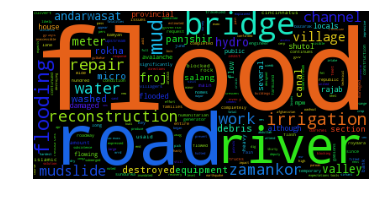

#### Arrest ####


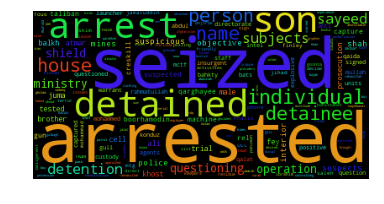

#### Assassination ####


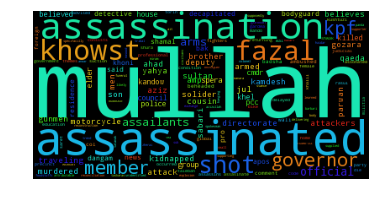

#### Carjacking ####


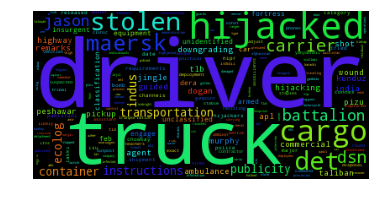

#### Green-Green ####


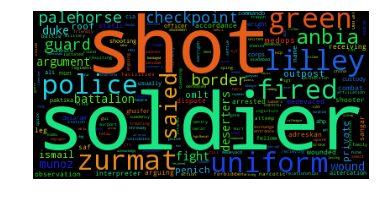

#### CASEVAC ####


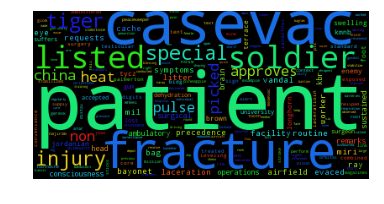

#### Downed Aircraft ####


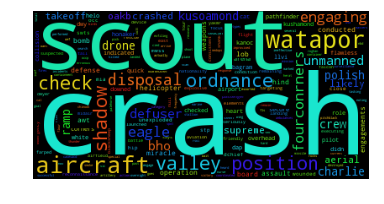

#### Refugees ####


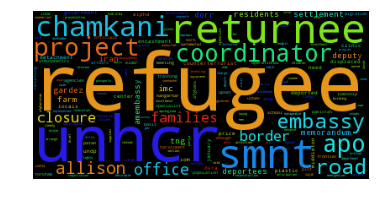

#### Hard Landing ####


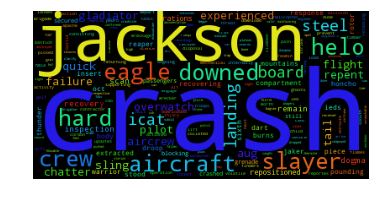

#### Drug Operation ####


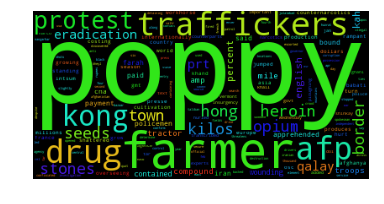

In [29]:
from wordcloud import WordCloud

for cat in categ:
    print "#### %s ####" % cat
    wordcloud = WordCloud().generate(doc_wordcloud[cat])
    img=plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [30]:
#Save to file
def savefile(category):
    filename = '../../../data/' + category
    with open(filename, "w") as text_file:
        text_file.write(doc_wordcloud[category])

for cat in categ:
    savefile(cat)

# Map 

In [31]:
import json

with open('../../../data/afg.geojson') as data_file:    
    geo_data = json.load(data_file)

# LDA

In [32]:
import logging, gensim, bz2
from gensim import corpora, models, similarities
import os
import logging
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import lxml.html

In [33]:
#will be used for text cleaning
stopwords = set(nltk.corpus.stopwords.words('english')) #load english stopwords
stoplist = set('for a of the and to in'.split())
manual_list=set('singapore event none expo nan get ticket tickets http https singaporean'.split())
wordnet_lemmatizer = WordNetLemmatizer() #create a WordNetLemmatizer to user for stemming our categories

In [34]:
documents = [summary for summary in db_wc_filt['Extended Summary']]
documents[0]

u'S REL Global Counter Terrorism Forces Taliban ATTACK HOME AND ASSASINATE AN AMF COMMANDER IN SHAJOY'

In [35]:
clean_dict={}
i=0;
for document in documents:
    try:
        cleaned_html = lxml.html.fromstring(str(document)).text_content()
    except:
        cleaned_html=""
    cleaned_html.encode('ascii', 'ignore')
    temp_token_list=nltk.word_tokenize(str(cleaned_html.encode('ascii', 'ignore')))
    content = [wordnet_lemmatizer.lemmatize(w.lower()) for w in temp_token_list if 
               ( w.isalpha() and w.lower() not in stopwords and w.lower() not in stoplist \
                and w.lower() not in manual_list and len(w)>2)]
    
    #save the cleaned tokens
    clean_dict[i]=content
    i+=1

In [36]:
# remove words that appear only once
from collections import defaultdict

frequency = defaultdict(int)
for text in clean_dict.values():
    for token in text:
        frequency[token] += 1

i=0
for text in clean_dict.values():
    clean_dict[i] = [token for token in text if frequency[token] > 1]
    i+=1

In [37]:
dictionary = corpora.Dictionary(clean_dict.values())
corpus = [dictionary.doc2bow(text) for text in clean_dict.values()]

In [38]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', 
                  level=logging.INFO)

#corpusmm = gensim.corpora.MmCorpus('corpus.mm')

lda = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=10)

In [39]:
lda.print_topics(num_topics=10, num_words=10)

[u'0.064*national + 0.062*afghan + 0.035*police + 0.020*army + 0.018*force + 0.013*security + 0.011*reported + 0.009*report + 0.009*base + 0.009*forward',
 u'0.024*road + 0.017*flood + 0.013*river + 0.012*bridge + 0.012*valley + 0.008*village + 0.008*damage + 0.008*destroyed + 0.007*team + 0.007*several',
 u'0.030*force + 0.012*district + 0.011*task + 0.010*killed + 0.008*village + 0.007*action + 0.007*report + 0.007*ghazni + 0.007*area + 0.007*official',
 u'0.032*national + 0.031*afghan + 0.022*force + 0.017*security + 0.016*army + 0.014*killed + 0.010*reported + 0.009*soldier + 0.008*report + 0.008*task',
 u'0.028*truck + 0.023*driver + 0.013*reported + 0.012*vehicle + 0.011*hijacked + 0.011*report + 0.010*insurgent + 0.010*cargo + 0.010*route + 0.010*information',
 u'0.015*smnt + 0.015*unhcr + 0.014*refugee + 0.012*province + 0.010*deputy + 0.010*coordinator + 0.009*jalalabad + 0.009*area + 0.008*returnees + 0.007*embassy',
 u'0.017*site + 0.017*update + 0.016*force + 0.013*reported

In [40]:
topics = [lda.show_topic(i) for i in range(10)]

In [41]:
#Write to json formatted file for D3

LDA_dicts = []

for index, topic in enumerate(topics):
    name = 'Topic ' + str(index+1)
    dic_out={'name': name , 'children':[]}
    children = []
    for topic in topics[index]:
        dic = {'name':[], 'size':[]}
        dic['name'] = topic[1]
        dic['size'] = topic[0]
        children.append(dic)
    dic_out['children'] = children
    LDA_dicts.append(dic_out)

In [42]:
#dump dict to JSON file
import json

with open('../../../data/LDA_topics.json', 'w') as fp:
    json.dump(LDA_dicts, fp)

In [43]:
LDA_dicts

[{'children': [{'name': u'national', 'size': 0.064492878289263866},
   {'name': u'afghan', 'size': 0.062302095299878957},
   {'name': u'police', 'size': 0.035039618363793781},
   {'name': u'army', 'size': 0.019927287313680816},
   {'name': u'force', 'size': 0.017828802459599731},
   {'name': u'security', 'size': 0.012929821457629071},
   {'name': u'reported', 'size': 0.010769141171117779},
   {'name': u'report', 'size': 0.0094067779236609896},
   {'name': u'base', 'size': 0.0091480890758117474},
   {'name': u'forward', 'size': 0.0088852642622693524}],
  'name': 'Topic 1'},
 {'children': [{'name': u'road', 'size': 0.023768932390473139},
   {'name': u'flood', 'size': 0.016899719723916351},
   {'name': u'river', 'size': 0.012606079892060926},
   {'name': u'bridge', 'size': 0.011842267079250039},
   {'name': u'valley', 'size': 0.01182179074476585},
   {'name': u'village', 'size': 0.0083735578914740458},
   {'name': u'damage', 'size': 0.0080408958321206495},
   {'name': u'destroyed', 'size'